In [55]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# !python --version

In [56]:
m = 10**6
n = 2
theta = np.array([[3], [1], [2]])
x1 = np.random.normal(3, 4, m)
x2 = np.random.normal(-1, 4, m)
x = np.stack((np.ones(m), x1, x2), axis=1).reshape((m, n+1, 1))

noise = np.random.normal(0, 2, m).reshape((m, 1))

# s = x1
# mu = 3
# sigma = 4
# count, bins, ignored = plt.hist(s, 30, density=True)
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#          linewidth=2, color='r')
# plt.show()

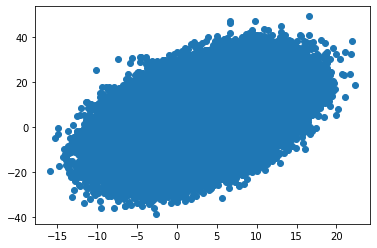

In [57]:
np.random.shuffle(x)
y = np.matmul(theta.T, x)
plt.scatter(x[:,1,:], y)
plt.show()

In [58]:
def hypothesis(theta, x):
    return np.matmul(theta.T, x)

In [59]:
def cost(y, x, theta):
    summation = 0
    for i in range(m):
        summation += (y[i] - hypothesis(theta, x[i]))**2
    return summation / (2 * m)

In [60]:
def stochastic_gradient_descent(learning_rate, r, epsilon):
    t = 0
    theta = np.zeros((n+1, 1))
#     prev_cost = cost(y, x, theta)
    kk = 0
#     thetas_and_costs = []
#     thetas_and_costs.append((theta, prev_cost))
    epoch = 0
    
    while True:
    
        for b in range(int(m/r)):
            theta_t = theta.copy()
            
            for j in range(n+1):
                summation = 0
                for k in range(r):
                    ik = b*r + k
#                     print(ik)
                    summation += (y[ik] - hypothesis(theta_t, x[ik])) * x[ik][j]
                theta[j] = theta[j] + (learning_rate * summation)
                
#             curr_cost = cost(y, x, theta)
#             print(b, t, theta, curr_cost)
            print(epoch, t, theta, theta_t, abs(theta - theta_t), (abs(theta - theta_t) <= epsilon).all(), kk)
            
            if ((abs(theta - theta_t) <= epsilon).all()):
                kk += 1
                print("wer", kk)
            else:
                kk = 0
            
            if kk > 2 or t > 80000:
                return theta
#             prev_cost = curr_cost
            t += 1
        epoch += 1

In [78]:
theta = stochastic_gradient_descent(0.0000001, 1000000, 1e-5)
# theta = gradient_descent(0.001, 1e-5)

0 0 [[0.4014486 ]
 [2.79884191]
 [2.79965242]] [[0.]
 [0.]
 [0.]] [[0.4014486 ]
 [2.79884191]
 [2.79965242]] False 0
1 1 [[ 0.20082419]
 [-0.68051255]
 [ 1.72514721]] [[0.4014486 ]
 [2.79884191]
 [2.79965242]] [[0.20062441]
 [3.47935446]
 [1.0745052 ]] False 0
2 2 [[0.95784431]
 [4.28130567]
 [1.40706115]] [[ 0.20082419]
 [-0.68051255]
 [ 1.72514721]] [[0.75702011]
 [4.96181822]
 [0.31808606]] False 0
3 3 [[ 0.11825896]
 [-3.49439963]
 [ 3.20228553]] [[0.95784431]
 [4.28130567]
 [1.40706115]] [[0.83958535]
 [7.7757053 ]
 [1.79522437]] False 0
4 4 [[ 1.8748866 ]
 [ 8.9782412 ]
 [-0.48397467]] [[ 0.11825896]
 [-3.49439963]
 [ 3.20228553]] [[ 1.75662764]
 [12.47264083]
 [ 3.68626019]] False 0
5 5 [[ -0.65407673]
 [-11.39499303]
 [  6.03413997]] [[ 1.8748866 ]
 [ 8.9782412 ]
 [-0.48397467]] [[ 2.52896333]
 [20.37323423]
 [ 6.51811464]] False 0
6 6 [[ 3.83251547]
 [21.93112044]
 [-4.92662497]] [[ -0.65407673]
 [-11.39499303]
 [  6.03413997]] [[ 4.4865922 ]
 [33.32611347]
 [10.96076495]] Fal

KeyboardInterrupt: 

In [46]:
a = np.array([2, 0])
b = np.array([1, 4])
abs(a - b) > 3

# theta_t = np.array([[]])

print((theta - theta < 2).all())

True
